In [60]:
%reset -f

## Imports

In [97]:
import re
from collections import Counter


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score,confusion_matrix,classification_report,ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import PrecisionRecallDisplay

## Load data

In [62]:
df_white = pd.read_csv('../data/winequality-white.csv', sep=';')
df_white

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [63]:
df_red = pd.read_csv('../data/winequality-red.csv', sep=';')
df_red

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [64]:
df = pd.concat([df_red, df_white])
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


## Exploratory data analysis

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6497 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 659.9 KB


In [66]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,6497.0,7.215307,1.296434,3.80000,6.40000,7.00000,7.70000,15.90000
volatile acidity,6497.0,0.339666,0.164636,0.08000,0.23000,0.29000,0.40000,1.58000
citric acid,6497.0,0.318633,0.145318,0.00000,0.25000,0.31000,0.39000,1.66000
residual sugar,6497.0,5.443235,4.757804,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,6497.0,0.056034,0.035034,0.00900,0.03800,0.04700,0.06500,0.61100
free sulfur dioxide,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
total sulfur dioxide,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6497.0,3.218501,0.160787,2.72000,3.11000,3.21000,3.32000,4.01000
sulphates,6497.0,0.531268,0.148806,0.22000,0.43000,0.51000,0.60000,2.00000


In [67]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [68]:
df['quality'].value_counts()

quality
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: count, dtype: int64

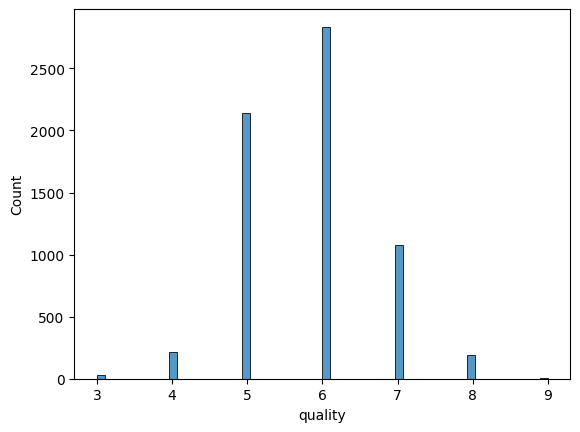

In [69]:
sns.histplot(df['quality']);

We can easily see that the target feature is not distributed in a balanced way. 

In [70]:
#sns.pairplot(df, hue='quality')

* The above table is just too complex to look up to. There are too many features to be dispayed.
* That's why we will see which are the features that correlate the most with the target feature and we will plot only those.

In [71]:

df.corr()['quality'].apply(abs).sort_values(ascending=False).drop(['quality'])

alcohol                 0.444319
density                 0.305858
volatile acidity        0.265699
chlorides               0.200666
citric acid             0.085532
fixed acidity           0.076743
free sulfur dioxide     0.055463
total sulfur dioxide    0.041385
sulphates               0.038485
residual sugar          0.036980
pH                      0.019506
Name: quality, dtype: float64

As we can see alcohol, volatile acidity, sulplates, citric acid correlate the most with quality.

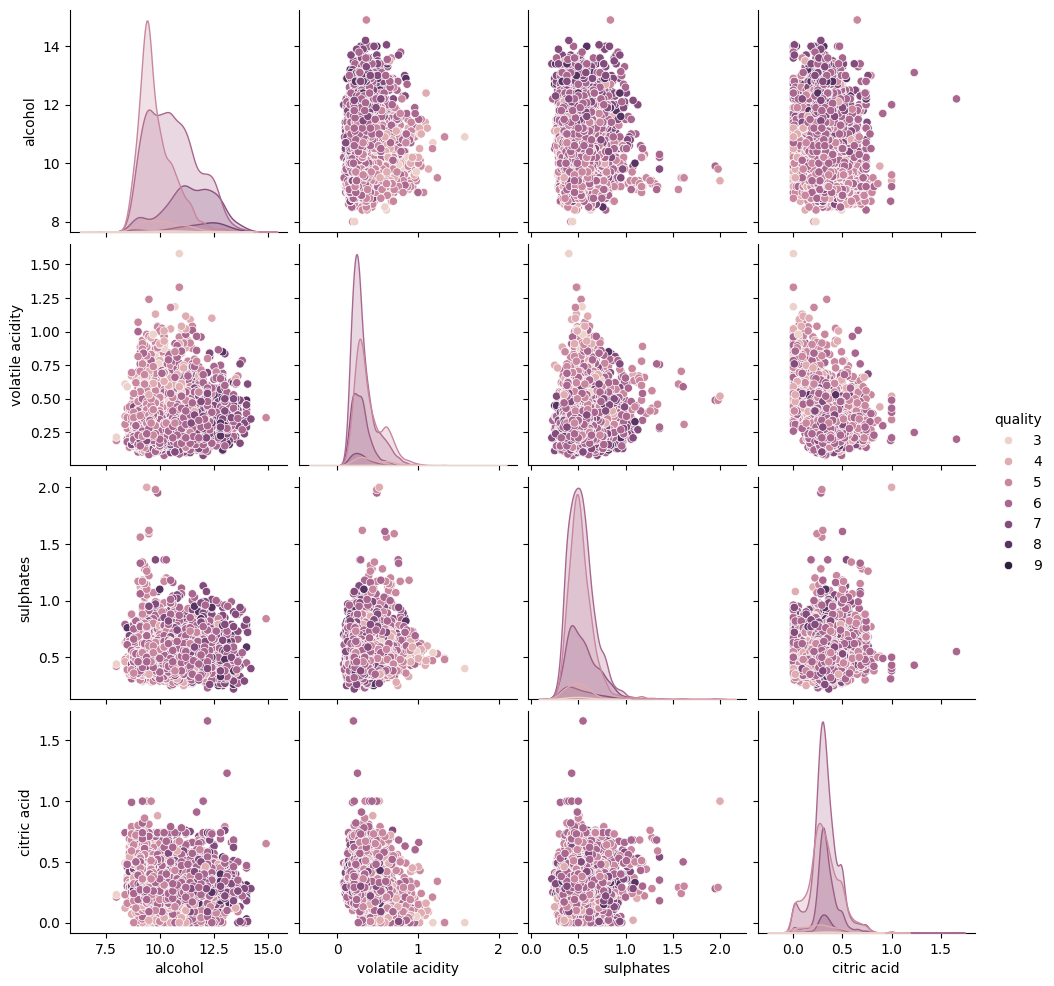

In [72]:
best_correlate = df[['alcohol', 'volatile acidity', 'sulphates', 'citric acid', 'quality']]
sns.pairplot(best_correlate, hue = 'quality')

* Higher alcohol and higher sulphates means better wine.
* Higher alcohol and less volatile acidity means better wine. 
* Other than that I can't see something that stands out in terms of correlation. Alcohol is obviously the best predictor.

## Prepare data

* We already saw that there are no null values and all of the values are good so there is no need for data cleaning

In [73]:
X = df.drop(columns=['quality'])
y = df['quality']

X:

In [74]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8


y:

In [75]:
y

0       5
1       5
2       5
3       6
4       5
       ..
4893    6
4894    5
4895    6
4896    7
4897    6
Name: quality, Length: 6497, dtype: int64

## Splitting the data

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

## Modelling

In [77]:
model_comparator = pd.DataFrame(columns = ['experiment', 'accuracy', 'precision', 'recall', 'f1-score'])
model_comparator

,experiment,accuracy,precision,recall,f1-score


#### Random

In [78]:
predictions = np.random.randint(df['quality'].min(), df['quality'].max(), y_test.shape[0])
predictions, y_test.values

(array([6, 6, 8, ..., 5, 8, 6]), array([6, 5, 6, ..., 6, 6, 6]))

In [79]:
np.random.seed(42)
predictions = np.random.randint(df['quality'].min(), df['quality'].max(), y_test.shape[0])

model_comparator = pd.concat([model_comparator, pd.DataFrame( {
        'experiment': ['random'],
        'accuracy': [accuracy_score(y_test.values, predictions)],
        'precision': [precision_score(y_test.values, predictions, average='weighted', zero_division=np.nan)],
        'recall': [recall_score(y_test.values, predictions, average='micro')],
        'f1-score': [f1_score(y_test.values, predictions, average='macro')]
})])

model_comparator


/tmp/ipykernel_4649/2572754685.py:4: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  model_comparator = pd.concat([model_comparator, pd.DataFrame( {


,experiment,accuracy,precision,recall,f1-score
0,random,0.179231,0.342333,0.179231,0.119247


#### Most frequent

In [89]:
predictions = np.full(y_test.shape[0], 5)

model_comparator = pd.concat([model_comparator, pd.DataFrame( {
        'experiment': ['most_frequent'],
        'accuracy': [accuracy_score(y_test.values, predictions)],
        'precision': [precision_score(y_test.values, predictions, average='weighted', zero_division=np.nan)],
        'recall': [recall_score(y_test.values, predictions, average='micro')],
        'f1-score': [f1_score(y_test.values, predictions, average='macro')]
})])

model_comparator

,experiment,accuracy,precision,recall,f1-score
0,random,0.179231,0.342333,0.179231,0.119247
0,random,0.326923,0.326923,0.326923,0.070393
0,most_frequent,0.326923,0.326923,0.326923,0.070393


#### SVM

In [83]:
svc = SVC()
svc

SVC()

In [84]:
svc.fit(X_train, y_train)

SVC()

In [90]:
predictions = svc.predict(X_test)

model_comparator = pd.concat([model_comparator, pd.DataFrame( {
        'experiment': ['SVC'],
        'accuracy': [accuracy_score(y_test.values, predictions)],
        'precision': [precision_score(y_test.values, predictions, average='weighted', zero_division=np.nan)],
        'recall': [recall_score(y_test.values, predictions, average='micro')],
        'f1-score': [f1_score(y_test.values, predictions, average='macro')]
})])

model_comparator

,experiment,accuracy,precision,recall,f1-score
0,random,0.179231,0.342333,0.179231,0.119247
0,random,0.326923,0.326923,0.326923,0.070393
0,most_frequent,0.326923,0.326923,0.326923,0.070393
0,SVC,0.437692,0.439394,0.437692,0.108290


#### Decision trees

In [93]:
dt = DecisionTreeClassifier(max_depth=3)
dt

DecisionTreeClassifier(max_depth=3)

In [94]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [96]:
predictions = dt.predict(X_test)

model_comparator = pd.concat([model_comparator, pd.DataFrame( {
        'experiment': ['decision_tree'],
        'accuracy': [accuracy_score(y_test.values, predictions)],
        'precision': [precision_score(y_test.values, predictions, average='weighted', zero_division=np.nan)],
        'recall': [recall_score(y_test.values, predictions, average='micro')],
        'f1-score': [f1_score(y_test.values, predictions, average='macro')]
})])

model_comparator

,experiment,accuracy,precision,recall,f1-score
0,random,0.179231,0.342333,0.179231,0.119247
0,random,0.326923,0.326923,0.326923,0.070393
0,most_frequent,0.326923,0.326923,0.326923,0.070393
0,SVC,0.437692,0.439394,0.437692,0.108290
0,decision tree,0.498462,0.498063,0.498462,0.214804


#### Random forest classifier

In [100]:
rf = RandomForestClassifier(n_estimators=100)
rf

RandomForestClassifier()

In [101]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [120]:
predictions = rf.predict(X_test)
predictions

model_comparator = pd.concat([model_comparator, pd.DataFrame( {
        'experiment': ['random_forest'],
        'accuracy': [accuracy_score(y_test.values, predictions)],
        'precision': [precision_score(y_test.values, predictions, average='macro', zero_division=np.nan)],
        'recall': [recall_score(y_test.values, predictions, average='macro')],
        'f1-score': [f1_score(y_test.values, predictions, average='macro')]
})])

model_comparator


,experiment,accuracy,precision,recall,f1-score
0,random,0.179231,0.342333,0.179231,0.119247
0,random,0.326923,0.326923,0.326923,0.070393
0,most_frequent,0.326923,0.326923,0.326923,0.070393
0,SVC,0.437692,0.439394,0.437692,0.108290
0,decision tree,0.498462,0.498063,0.498462,0.214804
0,random_forest,0.681538,0.689594,0.681538,0.383751
0,logistic_regression,0.059231,0.262690,0.059231,0.034043
0,logistic_regression,0.059231,0.083883,0.093720,0.034043
0,random_forest,0.681538,0.740870,0.360442,0.383751


#### Scaling data

In [109]:
scaler = StandardScaler()
scaler

StandardScaler()

In [110]:
X_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
435,6.9,0.20,0.37,6.2,0.027,24.0,97.0,0.99200,3.38,0.49,12.2
600,6.7,0.30,0.35,1.4,0.180,36.0,160.0,0.99370,3.11,0.54,9.4
1172,7.6,0.21,0.44,1.9,0.036,10.0,119.0,0.99130,3.01,0.70,12.8
3844,6.7,0.37,0.25,2.5,0.028,24.0,84.0,0.99090,3.14,0.36,11.7
3865,6.0,0.31,0.38,4.8,0.040,41.0,101.0,0.98968,3.24,0.56,13.1
...,...,...,...,...,...,...,...,...,...,...,...
1694,7.7,0.12,0.32,1.4,0.060,47.0,150.0,0.99520,3.37,0.42,9.2
562,7.7,0.34,0.27,8.8,0.063,39.0,184.0,0.99690,3.09,0.63,9.2
3633,6.6,0.30,0.25,8.0,0.036,21.0,124.0,0.99362,3.06,0.38,10.8
3484,6.2,0.37,0.24,6.1,0.032,19.0,86.0,0.98934,3.04,0.26,13.4


In [111]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_train

array([[-0.23581449, -0.83862638,  0.35170373, ...,  0.99815686,
        -0.28212271,  1.43980672],
       [-0.39067996, -0.23309094,  0.21413002, ..., -0.66853407,
         0.05199873, -0.92481201],
       [ 0.30621466, -0.77807283,  0.83321171, ..., -1.28582701,
         1.12118736,  1.94651074],
       ...,
       [-0.4681127 , -0.23309094, -0.47373852, ..., -0.97718054,
        -1.01718989,  0.25749735],
       [-0.77784364,  0.19078386, -0.54252537, ..., -1.10063913,
        -1.81908136,  2.45321475],
       [-0.23581449, -0.23309094, -0.47373852, ..., -0.23642901,
        -0.21529842, -1.00926268]])

In [112]:
scaled_X_test = scaler.fit_transform(X_test)
scaled_X_test

array([[ 2.76969158, -0.149919  ,  1.39505828, ...,  0.38963211,
         1.66943238,  0.83313875],
       [-0.95704614,  1.81995795, -1.8458094 , ...,  1.93018743,
         1.73826622,  0.09899076],
       [-0.34859916, -0.58082958, -0.5356714 , ...,  0.96734036,
         0.981094  , -0.79830123],
       ...,
       [-0.19648742, -1.31953344,  0.36073881, ..., -1.08673339,
         0.15508793,  0.18056276],
       [-1.10915788, -0.39615362, -0.12194361, ...,  0.26125251,
         0.36158945,  1.85278873],
       [-0.12043155, -0.88862286, -0.05298898, ...,  0.58220153,
         0.43042329, -0.06415324]])

#### Logistic regression

In [114]:
lr = LogisticRegression(max_iter=1000)
lr

LogisticRegression(max_iter=1000)

We need max_iter to be more than 100, because the algorithm could not converge in 100 iterations.

In [115]:
lr.fit(scaled_X_train, y_train)

LogisticRegression(max_iter=1000)

In [124]:
predictions = lr.predict(X_test)

model_comparator = pd.concat([model_comparator, pd.DataFrame( {
        'experiment': ['logistic_regression'],
        'accuracy': [accuracy_score(y_test.values, predictions)],
        'precision': [precision_score(y_test.values, predictions, average='macro', zero_division=np.nan)],
        'recall': [recall_score(y_test.values, predictions, average='macro')],
        'f1-score': [f1_score(y_test.values, predictions, average='macro')]
})])

model_comparator

/home/deyan/.local/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


,experiment,accuracy,precision,recall,f1-score
0,random,0.179231,0.342333,0.179231,0.119247
0,random,0.326923,0.326923,0.326923,0.070393
0,most_frequent,0.326923,0.326923,0.326923,0.070393
0,SVC,0.437692,0.439394,0.437692,0.108290
0,decision tree,0.498462,0.498063,0.498462,0.214804
0,random_forest,0.681538,0.689594,0.681538,0.383751
0,logistic_regression,0.059231,0.262690,0.059231,0.034043
0,logistic_regression,0.059231,0.083883,0.093720,0.034043
0,random_forest,0.681538,0.740870,0.360442,0.383751
0,logistic_regression,0.059231,0.083883,0.093720,0.034043


In [122]:
predictions

array([6, 6, 5, ..., 6, 6, 6])